<a href="https://colab.research.google.com/github/carloshernangarrido/vibration-control/blob/master/2dof_str_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [172]:
from typing import List, Union
import sympy as sm
import sympy.physics.mechanics as me

# For simulation
!pip install pydy
from pydy.system import System
import numpy as np # provides basic array types and some linear algebra
import matplotlib.pyplot as plt # used for plots

# For transfer function and state space representations
import scipy as sp

eps = 1e-6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Structural Equation Of Motion

In [173]:
# mass, stiffness and damping
m1, c1, k1, m2, c12, k12, t = sm.symbols('m1, c1, k1, m2, c12, k12, t')
# inertance
b1, b12 = sm.symbols('b1, b12')

M_s = sm.Matrix([[m1 + b1 + b12, -b12],
                 [-b12,           m2 + b12]])

K_s = sm.Matrix([[k1 + k12, -k12],
                 [-k12,      k12]])

C_s = sm.Matrix([[c1 + c12, -c12],
                 [-c12,      c12]])


# Frequency Domain

In [174]:
# State space
A = sm.Matrix([[sm.zeros(2,2), sm.eye(2)], 
               [-M_s.inv()*K_s,    -M_s.inv()*C_s]])
B_s = sm.Matrix([[m1],
                 [m2]])
B = sm.Matrix([[sm.zeros(2,1)],
               [-M_s.inv()*B_s]])
# sm.simplify(A.subs({b12: 0}))
sm.simplify(A)

Matrix([
[                                                                           0,                                                         0,                                                                            1,                                                         0],
[                                                                           0,                                                         0,                                                                            0,                                                         1],
[(b12*k12 - (b12 + m2)*(k1 + k12))/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2),         k12*m2/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2), (b12*c12 - (b12 + m2)*(c1 + c12))/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2),         c12*m2/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2)],
[       (b1*k12 - b12*k1 + k12*m1)/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2), -k12*(b1 + m1)/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2),        (b1*c12 - b12*c1 +

In [175]:
# sm.simplify(B.subs({b12: 0}))
sm.simplify(B)

Matrix([
[                                                                        0],
[                                                                        0],
[     -(b12*m2 + m1*(b12 + m2))/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2)],
[-(b12*m1 + m2*(b1 + b12 + m1))/(b1*b12 + b1*m2 + b12*m1 + b12*m2 + m1*m2)]])

# Parametric Study

In [176]:
# constans
k1_c = 1
c1_c = .1
m1_c = 1
k12_c = 1
c12_c = .1
m2_c = 1
b1_c = 0
b12_c = 0

# parameters
k1_p  = np.linspace( 1,  1+5, 6)
k12_p = np.linspace( 1,  1+5, 6)
c1_p  = np.linspace(.1, .1+5, 6)
c12_p = np.linspace(.1, .1+5, 6)
b1_p  = np.linspace( 0,    5, 6)
b12_p = np.linspace( 0,    5, 6)
m1_p  = np.linspace( 1,  1+5, 6)

k1_p, c1_p, b1_p

(array([1., 2., 3., 4., 5., 6.]),
 array([0.1, 1.1, 2.1, 3.1, 4.1, 5.1]),
 array([0., 1., 2., 3., 4., 5.]))

## Constant case

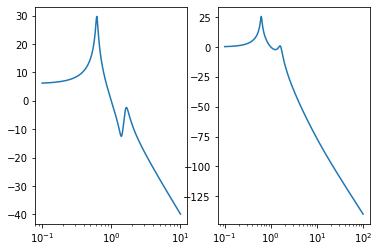

In [177]:
A_num = np.array(A.subs({k1:  k1_c,
                         c1:  c1_c,
                         m1:  m1_c,
                         k12: k12_c,
                         c12: c12_c,
                         m2:  m2_c, 
                         b1: b1_c,
                         b12: b12_c
                         }), dtype=float)

B_num = np.array(B.subs({m1: m1_c, m2:m2_c, b1: b1_c, b12: b12_c}), dtype=float)

C_num = 2*[None]
C_num[0] = [[1,  0, 0, 0]]
C_num[1] = [[-1, 1, 0, 0]]
C_num = np.asarray(C_num)

D_num = [[0]]         

w_c = 2*[None]
mag_c = 2*[None]
sys_c = 2*[None]
fig_c, ax_c = plt.subplots(1, 2)
for i in range(2):
  num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
  num = [coef for coef in num[0] if (abs(coef) > eps)]
  sys_c[i] = sp.signal.lti(num, den)
  w_c[i], mag_c[i], _ = sys_c[i].bode(w=1000)
  ax_c[i].semilogx(w_c[i], mag_c[i])    # Bode magnitude plot
plt.show()

## Variation of stiffness in the first floor

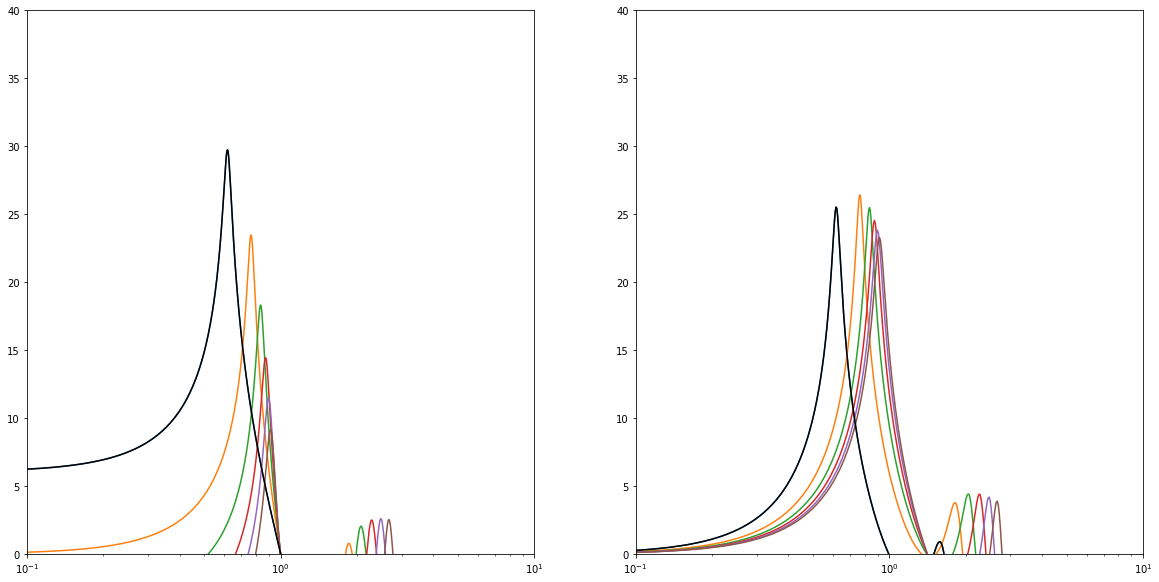

In [178]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for k1_p_ in k1_p:
  A_num = np.array(A.subs({k1:  k1_p_,
                           c1:  c1_c,
                           m1:  m1_c,
                           k12: k12_c,
                           c12: c12_c,
                           m2:  m2_c, 
                           b1:  b1_c,
                           b12: b12_c
                           }), dtype=float)
  B_num = np.array(B.subs({m1: m1_c, m2:m2_c, b1: b1_c, b12: b12_c}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([0, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

## Variation of damping in the first floor

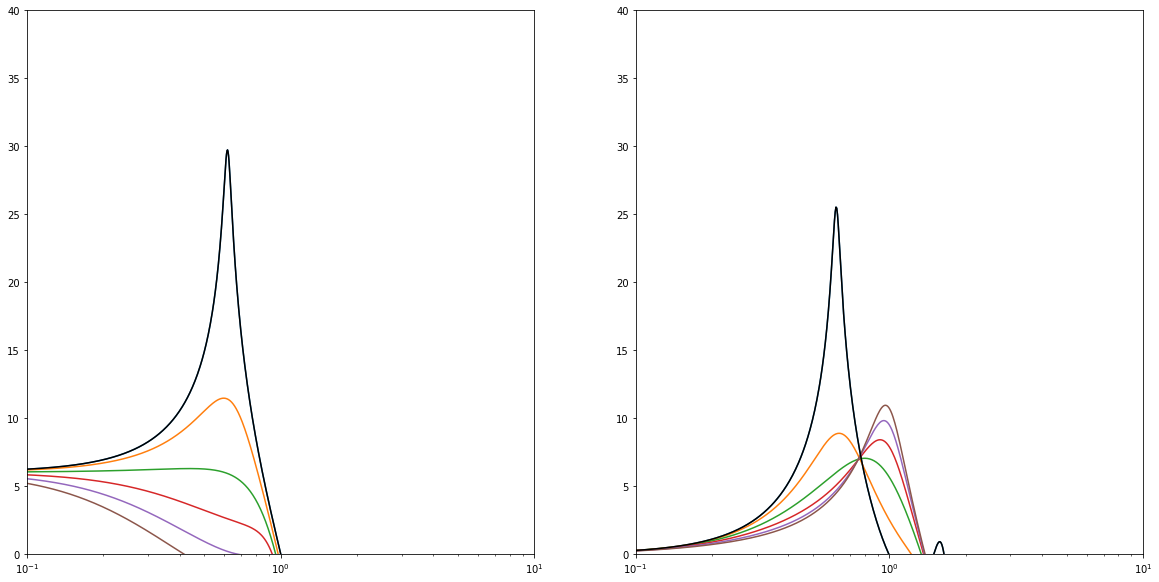

In [179]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for c1_p_ in c1_p:
  A_num = np.array(A.subs({k1:  k1_c,
                           c1:  c1_p_,
                           m1:  m1_c,
                           k12: k12_c,
                           c12: c12_c,
                           m2:  m2_c, 
                           b1: b1_c,
                           b12: b12_c
                           }), dtype=float)

  B_num = np.array(B.subs({m1: m1_c, m2: m2_c, b1: b1_c, b12: b12_c}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([0, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

## Variation of mass in the first floor

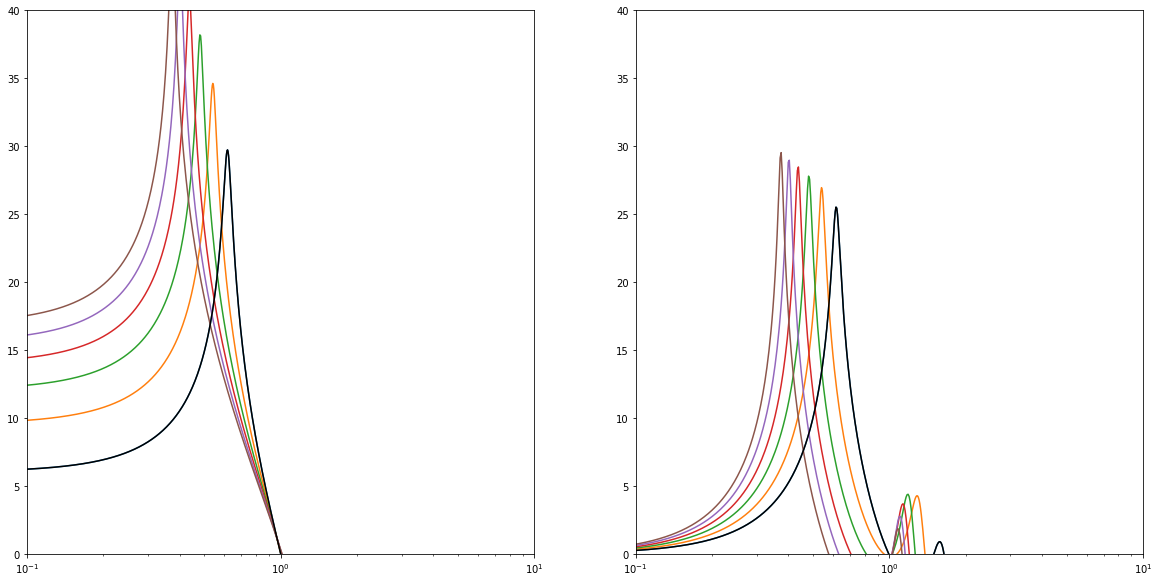

In [180]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for m1_p_ in m1_p:
  A_num = np.array(A.subs({k1:  k1_c,
                           c1:  c1_c,
                           m1:  m1_p_,
                           k12: k12_c,
                           c12: c12_c,
                           m2:  m2_c,
                           b1:  b1_c,
                           b12: b12_c
                           }), dtype=float)

  B_num = np.array(B.subs({m1: m1_c, m2: m2_c, b1: b1_c, b12: b12_c}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([0, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

## Variation of inertance in the first floor

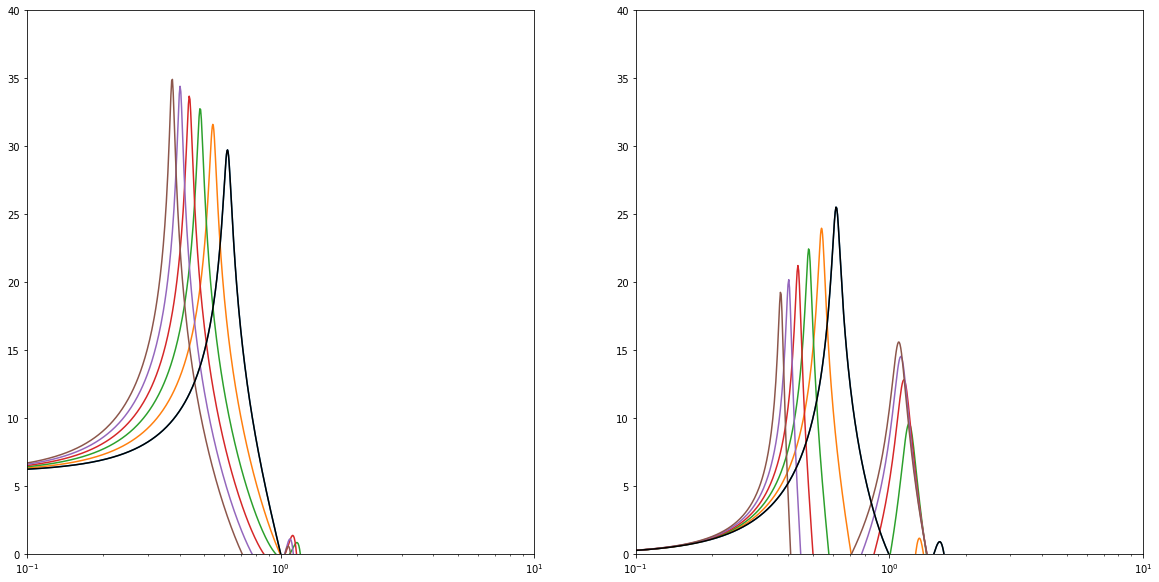

In [181]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for b1_p_ in b1_p:
  A_num = np.array(A.subs({k1:  k1_c,
                           c1:  c1_c,
                           m1:  m1_c,
                           k12: k12_c,
                           c12: c12_c,
                           m2:  m2_c,
                           b1:  b1_p_,
                           b12: b12_c}), dtype=float)

  B_num = np.array(B.subs({m1: m1_c, m2: m2_c, b1: b1_p_, b12: b12_c}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([0, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

## Variation of inertance in the second floor

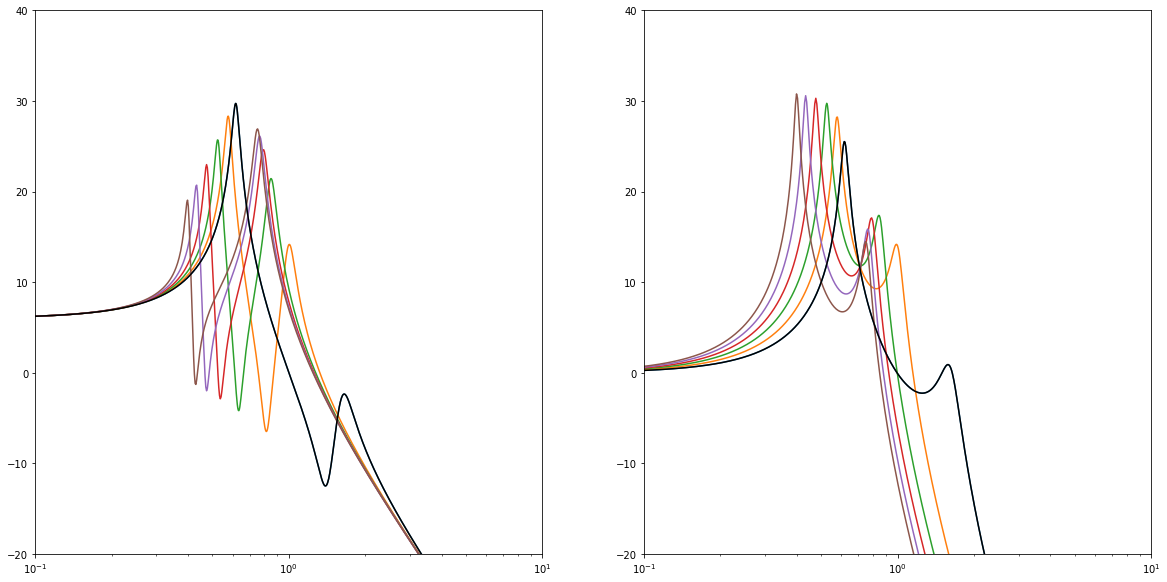

In [182]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for b12_p_ in b12_p:
  A_num = np.array(A.subs({k1:  k1_c,
                           c1:  c1_c,
                           m1:  m1_c,
                           k12: k12_c,
                           c12: c12_c,
                           m2:  m2_c,
                           b1:  b1_c,
                           b12: b12_p_}), dtype=float)

  B_num = np.array(B.subs({m1: m1_c, m2: m2_c, b1: b1_c, b12: b12_p_}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([-20, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

## Variation of stiffness in the second floor

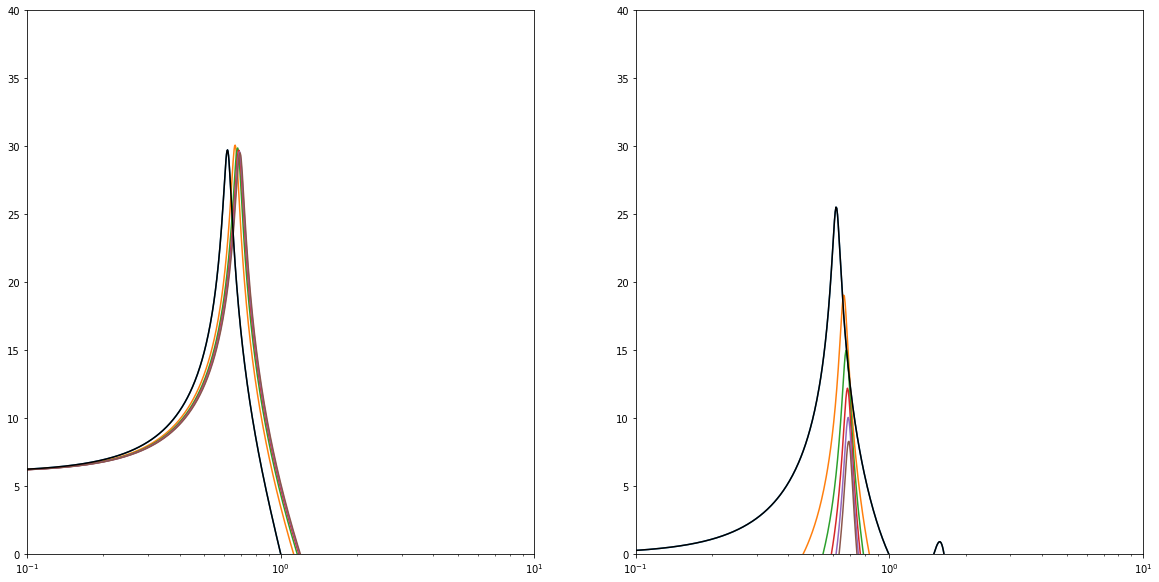

In [183]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for k12_p_ in k12_p:
  A_num = np.array(A.subs({k1:  k1_c,
                           c1:  c1_c,
                           m1:  m1_c,
                           k12: k12_p_,
                           c12: c12_c,
                           m2:  m2_c,
                           b1:  b1_c,
                           b12: b12_c}), dtype=float)

  B_num = np.array(B.subs({m1: m1_c, m2: m2_c, b1: b1_c, b12: b12_c}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([0, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

## Variation of damping in the second floor

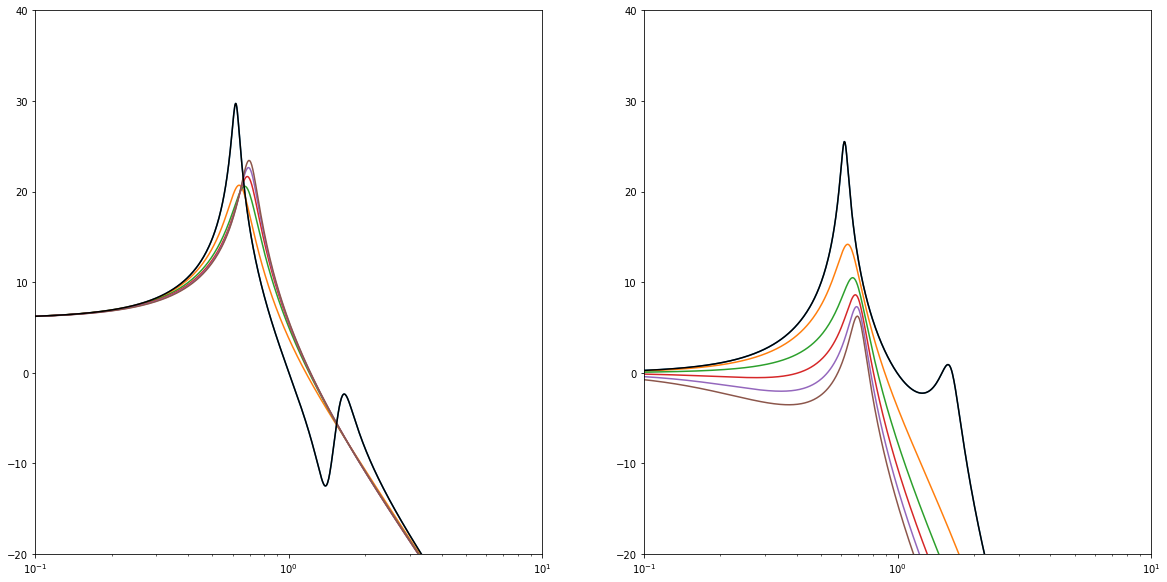

In [184]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for c12_p_ in c12_p:
  A_num = np.array(A.subs({k1:  k1_c,
                           c1:  c1_c,
                           m1:  m1_c,
                           k12: k12_c,
                           c12: c12_p_,
                           m2:  m2_c,
                           b1:  b1_c,
                           b12: b12_c}), dtype=float)

  B_num = np.array(B.subs({m1: m1_c, m2: m2_c, b1: b1_c, b12: b12_c}), dtype=float)

  C_num = 2*[None]
  C_num[0] = [[1,  0, 0, 0]]
  C_num[1] = [[-1, 1, 0, 0]]

  D_num = [[0]]         

  mag = 2*[None]
  sys = 2*[None]
  for i in range(2):
    num, den = sp.signal.ss2tf(A_num, B_num, C_num[i], D_num)
    num = [coef for coef in num[0] if (abs(coef) > eps)]
    sys[i] = sp.signal.lti(num, den)
    w, mag[i], _ = sys[i].bode(w=1000)
    ax[i].semilogx(w, mag[i])    # Bode magnitude plot
    ax[i].set_ylim([-20, 40])
    ax[i].set_xlim([.1, 10])
for i in range(2):
  ax[i].semilogx(w_c[i], mag_c[i], color='black')    # Bode magnitude plot
plt.show()

# Optimización

## Classes

In [185]:
class OperatingPoint:
  def __init__(self, parameters: dict, num: List[float], den: List[float], 
               w = np.linspace(0, 10, 10000), calc_bode: bool = False):
    assert isinstance(parameters, dict)
    assert hasattr(num, "__len__") and hasattr(den, "__len__"), 'num and den must be array-like of floats'
    self.parameters = parameters
    self.num = num
    self.den = den
    self._tf = sp.signal.lti(self.num, self.den)
    self._freqresp_w, self._freqresp_H = self._tf.freqresp(w=w)
    if calc_bode:
      self._bode_w, self._bode_mag, self._bode_phase = self._tf.bode()
    
    self.H_inf = np.linalg.norm(self._freqresp_H, ord=np.inf)
    self.H_2 = np.linalg.norm(self._freqresp_H, ord=2)


class Optimization:
  def __init__(self, operating_points: List[OperatingPoint]):
    for operating_point in operating_points:
      assert isinstance(operating_point, OperatingPoint), 'operating_points must be of class OperatingPoint'
    self.operating_points = operating_points
    self.parameters = {key: [op.parameters[key] for op in self.operating_points] 
                       for key in operating_point.parameters.keys()}
  
  def H_inf_arr(self):
    return np.asarray([op.H_inf for op in self.operating_points])

  def min_H_inf(self):
    arr = self.H_inf_arr()
    ind_min = np.argmin(arr)
    return ind_min, arr[ind_min]
  
  def H_2_arr(self):
    return np.asarray([op.H_2 for op in self.operating_points])

  def min_H_inf(self):
    arr = self.H_inf_arr()
    ind_min = np.argmin(arr)
    return ind_min, arr[ind_min]   

## Optimization $H_{\infty}$

### Variation of inertance in the second floor

In [186]:
i_output = 0 # 0: first story drift, 1: second story drift

b12_p_opt = np.linspace(0, 5, 100)
ops = []
parameters = {'k1':  k1_c,
              'c1':  c1_c,
              'm1':  m1_c,
              'k12': k12_c,
              'c12': c12_c,
              'm2':  m2_c,
              'b1':  b1_c,
              'b12': 0}
for b12_p_ in b12_p_opt:
  parameters['b12'] = b12_p_
  A_num = np.array(A.subs(parameters), dtype=float)
  num, den = sp.signal.ss2tf(A_num, B_num, C_num[i_output], D_num)
  num = [coef for coef in num[0] if (abs(coef) > eps)]
  ops.append(OperatingPoint(parameters=parameters.copy(), num=num, den=den))
opt_b12 = Optimization(operating_points=ops)
opt_b12_ind, _ = opt_b12.min_H_inf()

### Plots

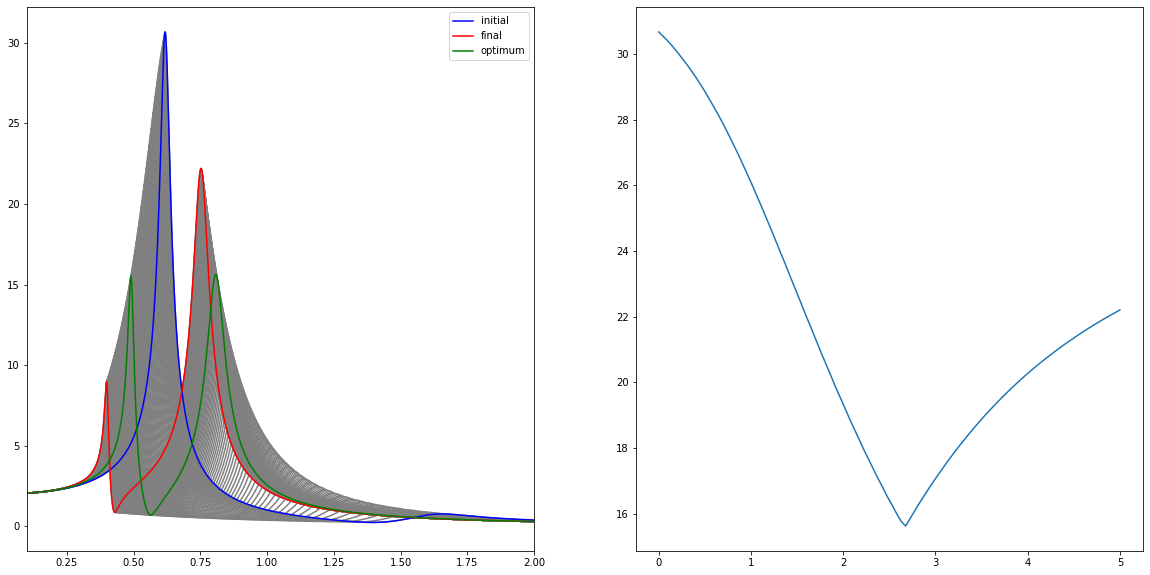

In [187]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for op in opt_b12.operating_points:
  ax[0].plot(op._freqresp_w, np.abs(op._freqresp_H), color='grey')
  ax[0].set_xlim([.1, 2])
ax[0].plot(op._freqresp_w, np.abs(opt_b12.operating_points[0]._freqresp_H), 
           color='blue', label='initial')
ax[0].plot(op._freqresp_w, np.abs(opt_b12.operating_points[-1]._freqresp_H), 
           color='red', label='final')
ax[0].plot(op._freqresp_w, np.abs(opt_b12.operating_points[opt_b12_ind]._freqresp_H), 
           color='green', label='optimum')
ax[0].legend()
ax[1].plot(opt_b12.parameters['b12'], opt_b12.H_inf_arr())
plt.show()




### Variation of damping in the second floor with inertance

In [188]:
i_output = 0 # 0: first story drift, 1: second story drift

parameters = {key: opt_b12.parameters[key][opt_b12_ind] for key in opt_b12.parameters.keys()}
c12_p_opt = np.linspace(parameters['c12'], 20*parameters['c12'], 100)
ops = []
for c12_p_ in c12_p_opt:
  parameters['c12'] = c12_p_
  A_num = np.array(A.subs(parameters), dtype=float)
  num, den = sp.signal.ss2tf(A_num, B_num, C_num[i_output], D_num)
  num = [coef for coef in num[0] if (abs(coef) > eps)]
  ops.append(OperatingPoint(parameters=parameters.copy(), num=num, den=den))
opt_c12 = Optimization(operating_points=ops)
opt_c12_ind, _ = opt_c12.min_H_inf()

### Plots

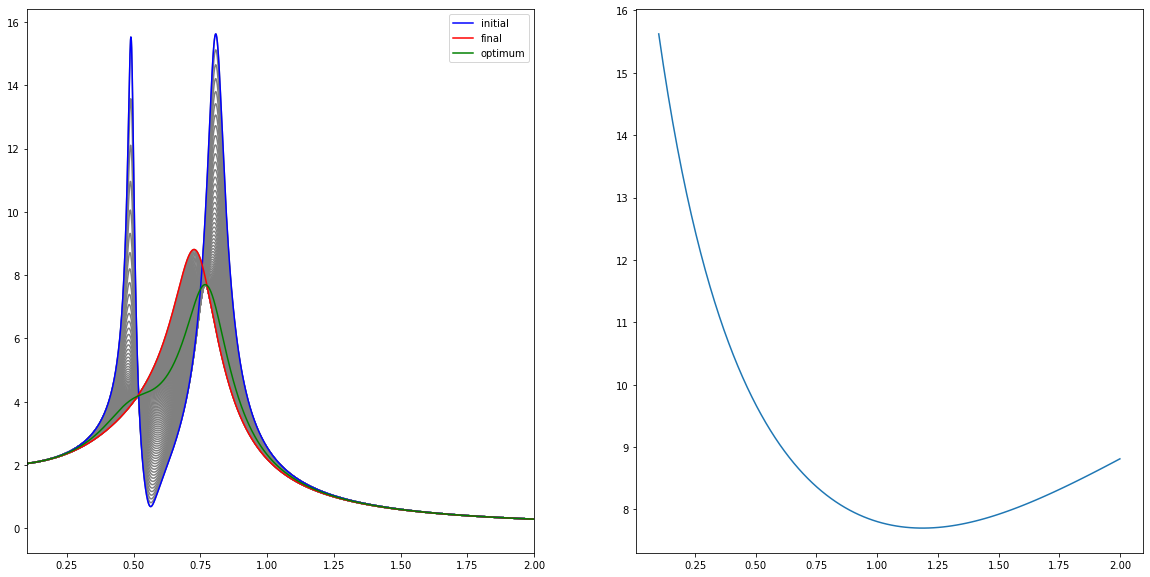

In [189]:
fig, ax = plt.subplots(1, 2, figsize=[20, 10])
for op in opt_c12.operating_points:
  ax[0].plot(op._freqresp_w, np.abs(op._freqresp_H), color='grey')
  ax[0].set_xlim([.1, 2])
ax[0].plot(op._freqresp_w, np.abs(opt_c12.operating_points[0]._freqresp_H), 
           color='blue', label='initial')
ax[0].plot(op._freqresp_w, np.abs(opt_c12.operating_points[-1]._freqresp_H), 
           color='red', label='final')
ax[0].plot(op._freqresp_w, np.abs(opt_c12.operating_points[opt_c12_ind]._freqresp_H), 
           color='green', label='optimum')
ax[0].legend()
ax[1].plot(opt_c12.parameters['c12'], opt_c12.H_inf_arr())
plt.show()




## Iterative Optimization $H_{\infty}$

### Functions

Text(0.5, 0, '$b_{12}$')

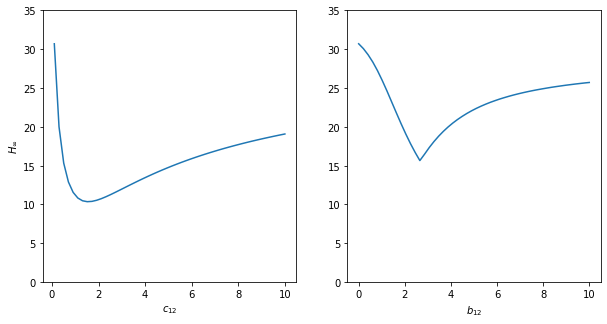

In [194]:
i_output = 0
parameters = {'k1':  k1_c,
              'c1':  c1_c,
              'm1':  m1_c,
              'k12': k12_c,
              'c12': c12_c,
              'm2':  m2_c,
              'b1':  b1_c,
              'b12': b12_c}

def H_inf_b12(b12, parameters_c):
  parameters = parameters_c.copy()
  parameters['b12'] = b12
  A_num = np.array(A.subs(parameters), dtype=float)
  num, den = sp.signal.ss2tf(A_num, B_num, C_num[i_output], D_num)
  num = [coef for coef in num[0] if (abs(coef) > eps)]
  return OperatingPoint(parameters=parameters.copy(), num=num, den=den).H_inf

def H_inf_c12(c12, parameters_c):
  parameters = parameters_c.copy()
  parameters['c12'] = c12
  A_num = np.array(A.subs(parameters), dtype=float)
  num, den = sp.signal.ss2tf(A_num, B_num, C_num[i_output], D_num)
  num = [coef for coef in num[0] if (abs(coef) > eps)]
  return OperatingPoint(parameters=parameters.copy(), num=num, den=den).H_inf

def parameters2op(parameters, i_output, A, B_num, C_num, D_num):
  A_num = np.array(A.subs(parameters), dtype=float)
  num, den = sp.signal.ss2tf(A_num, B_num, C_num[i_output], D_num)
  num = [coef for coef in num[0] if (abs(coef) > eps)]
  return OperatingPoint(parameters=parameters.copy(), num=num, den=den)

# plots
steps = 50
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
c12_p = np.linspace(c12_c, 100*c12_c, steps)
b12_p = np.linspace(0, 10, steps)
ax[0].plot(c12_p, np.vectorize(lambda x : H_inf_c12(x, parameters))(c12_p))
ax[0].set_ylim((0, 35))
ax[0].set_xlabel('$c_{12}$')
ax[0].set_ylabel('$H_{\infty}$')
ax[1].plot(b12_p, np.vectorize(lambda x : H_inf_b12(x, parameters))(b12_p))
ax[1].set_ylim((0, 35))
ax[1].set_xlabel('$b_{12}$')

### Optimization

In [191]:
n_iter = 3
parameters = {'k1':  k1_c,
              'c1':  c1_c,
              'm1':  m1_c,
              'k12': k12_c,
              'c12': c12_c,
              'm2':  m2_c,
              'b1':  b1_c,
              'b12': b12_c}
ops_1 = []
ops_12 = []
for i_iter in range(n_iter):
  ops_1.append(parameters2op(parameters, 0, A, B_num, C_num, D_num))
  ops_12.append(parameters2op(parameters, 1, A, B_num, C_num, D_num))
  fb12 = lambda x : H_inf_b12(x, parameters)
  parameters['b12'] = sp.optimize.minimize_scalar(fb12).x

  ops_1.append(parameters2op(parameters, 0, A, B_num, C_num, D_num))
  ops_12.append(parameters2op(parameters, 1, A, B_num, C_num, D_num))
  fc12 = lambda x : H_inf_c12(x, parameters)
  parameters['c12'] = sp.optimize.minimize_scalar(fc12).x


### Plots

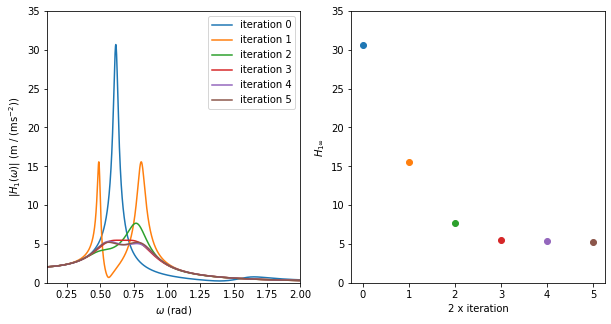

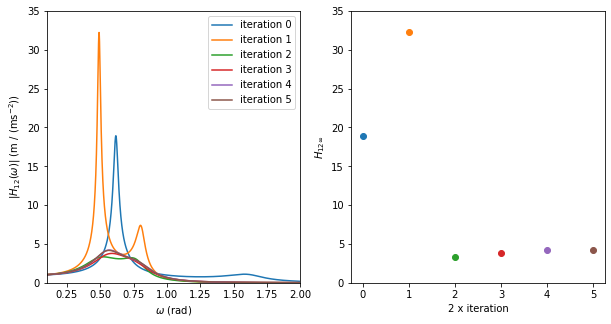

In [193]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
for i, op in enumerate(ops_1):
  ax[0].plot(op._freqresp_w, np.abs(op._freqresp_H), label=f'iteration {i}')
  ax[0].set_xlim([.1, 2])
  ax[0].set_ylim([0, 35])
  ax[0].set_xlabel('$\omega$ (rad)')
  ax[0].set_ylabel('$|H_1(\omega)|$ (m / (ms$^{-2}$))')
  ax[1].plot(i, op.H_inf, marker='o')
  ax[1].set_ylim([0, 35])
  ax[1].set_ylabel('$H_{1\infty}$')
  ax[1].set_xlabel('2 x iteration')
ax[0].legend()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=[10, 5])
for i, op in enumerate(ops_12):
  ax[0].plot(op._freqresp_w, np.abs(op._freqresp_H), label=f'iteration {i}')
  ax[0].set_xlim([.1, 2])
  ax[0].set_ylim([0, 35])
  ax[0].set_xlabel('$\omega$ (rad)')
  ax[0].set_ylabel('$|H_{12}(\omega)|$ (m / (ms$^{-2}$))')
  ax[1].plot(i, op.H_inf, marker='o')
  ax[1].set_ylim([0, 35])
  ax[1].set_ylabel('$H_{12 \infty}$')
  ax[1].set_xlabel('2 x iteration')
ax[0].legend()
plt.show()
